In [ ]:
!pip install gymnasium

In [ ]:
import gymnasium as gym
import numpy as np
import random
import time

#FrozenLake-v1

In [ ]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [ ]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


##Q_learning

In [ ]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, done, info, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [ ]:
# Hyperparameters
gamma = 0.98
learning_rate = 0.05
max_epsilon = 1.0
min_epsilon = 0.001
epsilon_decay_rate = 0.0005

num_episodes = 30000
num_steps_per_episode = 100

In [ ]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 29999 finished


In [ ]:
q_table

array([[0.37944893, 0.33678841, 0.34360361, 0.32618109],
       [0.20353122, 0.19590539, 0.18467956, 0.33700394],
       [0.27065617, 0.27269969, 0.26687023, 0.30459741],
       [0.19741058, 0.12061106, 0.18717272, 0.27544592],
       [0.40595949, 0.31043142, 0.25209564, 0.30593551],
       [0.        , 0.        , 0.        , 0.        ],
       [0.25153663, 0.10322925, 0.15480263, 0.07386419],
       [0.        , 0.        , 0.        , 0.        ],
       [0.30385246, 0.28552472, 0.25777603, 0.44603475],
       [0.40588786, 0.50757544, 0.39072373, 0.27307947],
       [0.49530625, 0.38237325, 0.32124735, 0.2926303 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.37685472, 0.52457527, 0.636171  , 0.42257607],
       [0.65667064, 0.78704737, 0.69906898, 0.70148998],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
sum(rewards_all)

18634.0

In [ ]:
sum(rewards_all[0:1000])

19.0

In [ ]:
sum(rewards_all[1000:2000])

66.0

In [ ]:
sum(rewards_all[2000:3000])

179.0

In [ ]:
sum(rewards_all[9000:10000])

706.0

In [ ]:
sum(rewards_all[19000:20000])

728.0

In [ ]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [ ]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, done, info, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        state = next_state

    return (total_reward, steps)

In [ ]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [ ]:
play_multiple_times(env, q_table, 1000)

Number of successes: 822/1000
Average number of steps: 49.839416058394164


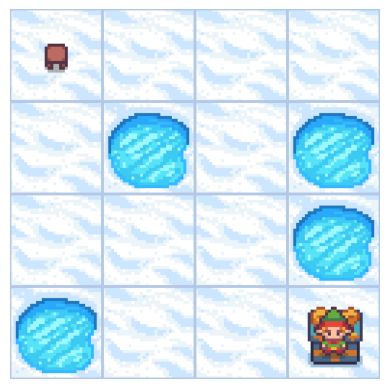

(1.0, 40)

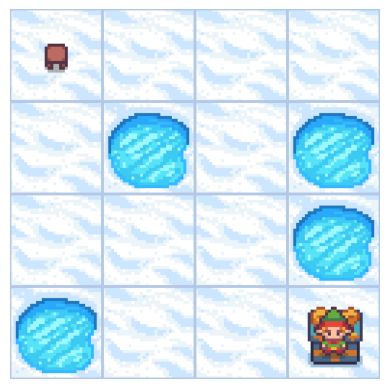

In [ ]:
play(env, q_table, render=True)

##SARSA

In [ ]:
def SARSA(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)

        exploration = random.uniform(0,1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        for step in range(num_steps_per_episode):
            next_state, reward, done, info, _ = env.step(action)
            #print(info)

            #Choosing the next action
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            #next_state_1, reward_1,done_1, info, _ =env.step(next_action)
            #print(info)

            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state,next_action])

            reward_episode += reward
            state = next_state
            action= next_action
            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [ ]:
# Hyperparameters
gamma = 0.98
learning_rate = 0.05
max_epsilon = 1
min_epsilon = 0.001
epsilon_decay_rate = 0.0005

num_episodes = 30000
num_steps_per_episode = 100

In [ ]:
q_table_sarsa, rewards_all_sarsa = SARSA(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 29999 finished


In [ ]:
print(q_table_sarsa)

[[0.37519214 0.34297494 0.3442809  0.33870778]
 [0.18097736 0.14728736 0.10160862 0.32985157]
 [0.3042911  0.16849601 0.16274129 0.15118143]
 [0.01843652 0.01084072 0.0074477  0.17961304]
 [0.39545659 0.27640471 0.23505456 0.3141537 ]
 [0.         0.         0.         0.        ]
 [0.2966457  0.1430879  0.14535614 0.09210076]
 [0.         0.         0.         0.        ]
 [0.26941763 0.32271046 0.32178184 0.43978919]
 [0.32133847 0.55156945 0.40448587 0.33294331]
 [0.58013728 0.30515196 0.25170794 0.2693209 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.4169023  0.54078069 0.60859931 0.45188571]
 [0.64088558 0.83884857 0.67597945 0.6587373 ]
 [0.         0.         0.         0.        ]]


In [ ]:
sum(rewards_all_sarsa)

18329.0

In [ ]:
play_multiple_times(env,q_table_sarsa,1000)

Number of successes: 780/1000
Average number of steps: 41.51923076923077


In [ ]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

In [ ]:
window = 100
average_y_sarsa = []
for ind in range(len(rewards_all_sarsa) - window + 1):
    average_y_sarsa.append(np.mean(rewards_all_sarsa[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_sarsa.insert(0, np.nan)

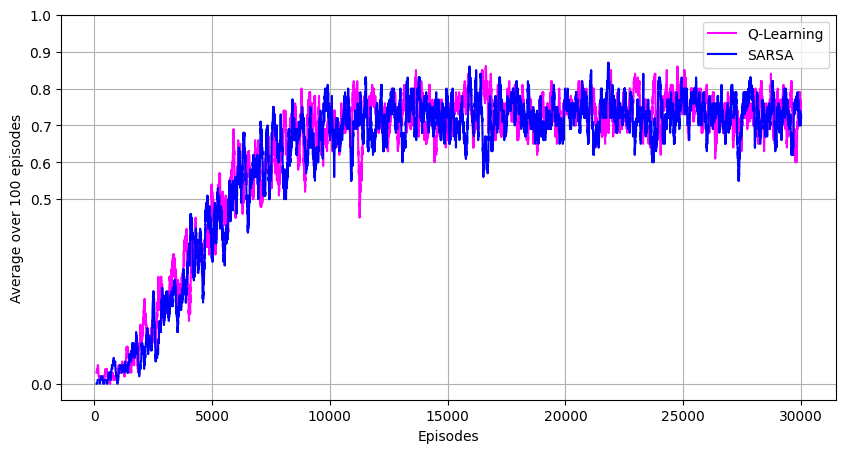

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(rewards_all_sarsa)), average_y_sarsa, color='blue', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

- Trong Frozen Lake 4x4, hai thuật toán SARSA và Q-learning có số điểm thưởng qua từng episode gần giống nhau, không có nhiều sự khác biệt.
- Trung bình số ván chơi tuân theo chiến lược của Q-learning là khoảng 820, còn của SARSA là 800. Số ván chơi có thể thắng được khi sử dụng Q-learning cao hơn SARSA.
- Số liệu cho Q-learning theo từng giai đoạn có độ chệnh lệnh nhiều hơn.
- Episode từ 0 đến 1000, tổng số điểm thưởng tăng dần, sau đó nó được giữ một mức ổn định.



#FrozenLake8x8-v1

In [ ]:
env = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")

In [ ]:
# Hyperparameters
gamma = 0.98
learning_rate = 0.02
max_epsilon = 1.0
min_epsilon = 0.0001
epsilon_decay_rate = 0.00005

num_episodes = 80000
num_steps_per_episode = 200

In [ ]:
q_table_q_learning, rewards_all_q_learning = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 79999 finished


In [ ]:
q_table_q_learning

array([[2.02524411e-01, 2.02479779e-01, 2.02574642e-01, 2.04084530e-01],
       [2.13475554e-01, 2.12433997e-01, 2.14485702e-01, 2.13530093e-01],
       [2.32767006e-01, 2.32572690e-01, 2.35355363e-01, 2.32520164e-01],
       [2.53693513e-01, 2.54579799e-01, 2.58003696e-01, 2.54209520e-01],
       [2.80872468e-01, 2.84617539e-01, 2.83007230e-01, 2.82994145e-01],
       [3.09260035e-01, 3.10548960e-01, 3.14070404e-01, 3.10380664e-01],
       [3.27229566e-01, 3.28294072e-01, 3.37588325e-01, 3.27325286e-01],
       [3.33136125e-01, 3.33903182e-01, 3.44156800e-01, 3.33455768e-01],
       [2.00456064e-01, 2.00259894e-01, 2.00471530e-01, 2.00776548e-01],
       [2.07533412e-01, 2.07725573e-01, 2.07680472e-01, 2.09403792e-01],
       [2.15025237e-01, 2.21029064e-01, 2.19847195e-01, 2.25752083e-01],
       [1.68114564e-01, 1.68712667e-01, 1.68768529e-01, 2.50109684e-01],
       [2.64896578e-01, 2.73828217e-01, 2.78574355e-01, 2.73681981e-01],
       [3.08052230e-01, 3.10794820e-01, 3.16459773e

In [ ]:
sum(rewards_all_q_learning)

31630.0

In [ ]:
play_multiple_times(env, q_table_q_learning, 1000)

Number of successes: 843/1000
Average number of steps: 86.56820877817319


In [ ]:
# Hyperparameters
gamma = 0.98
learning_rate = 0.02
max_epsilon = 1.0
min_epsilon = 0.0001
epsilon_decay_rate = 0.0001

num_episodes = 80000
num_steps_per_episode = 200

In [ ]:
q_table_sarsa, rewards_all_sarsa = SARSA(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 79999 finished


In [ ]:
print(q_table_sarsa)

[[1.94754979e-01 1.94669983e-01 1.91986576e-01 2.07541535e-01]
 [2.04217248e-01 2.07221700e-01 2.19010329e-01 2.06712096e-01]
 [2.23590643e-01 2.24788419e-01 2.42240493e-01 2.23051311e-01]
 [2.42772646e-01 2.46382692e-01 2.69060754e-01 2.46416408e-01]
 [2.63442900e-01 2.69909707e-01 2.94472074e-01 2.71598859e-01]
 [2.86863029e-01 2.94298831e-01 3.24627690e-01 2.93299466e-01]
 [3.18390053e-01 3.15839130e-01 3.40721590e-01 3.14953161e-01]
 [3.23093634e-01 3.24748912e-01 3.44990326e-01 3.22322534e-01]
 [1.76372217e-01 1.75670893e-01 1.74962198e-01 2.05152563e-01]
 [1.87625661e-01 1.91745743e-01 1.97892281e-01 2.14452745e-01]
 [1.90094644e-01 1.90524412e-01 2.00176115e-01 2.31806449e-01]
 [1.48237997e-01 1.70884012e-01 1.96897407e-01 2.55253324e-01]
 [2.43716486e-01 2.44877991e-01 2.61701941e-01 2.84797440e-01]
 [2.81762482e-01 2.87180089e-01 3.22273834e-01 2.91513970e-01]
 [3.27489256e-01 3.33374393e-01 3.55420391e-01 3.27237504e-01]
 [3.41754444e-01 3.70106105e-01 3.39160197e-01 3.395682

In [ ]:
sum(rewards_all_sarsa)

48009.0

In [ ]:
play_multiple_times(env,q_table_sarsa,1000)

Number of successes: 772/1000
Average number of steps: 75.85103626943005


In [ ]:
window = 500
average_y_q_learning = []
for ind in range(len(rewards_all_q_learning) - window + 1):
    average_y_q_learning.append(np.mean(rewards_all_q_learning[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_q_learning.insert(0, np.nan)

In [ ]:
window = 500
average_y_sarsa = []
for ind in range(len(rewards_all_sarsa) - window + 1):
    average_y_sarsa.append(np.mean(rewards_all_sarsa[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_sarsa.insert(0, np.nan)

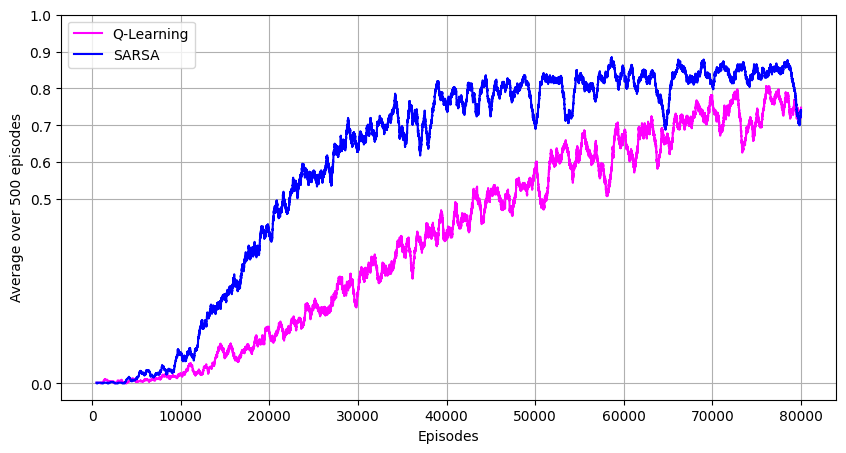

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_q_learning)), average_y_q_learning, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(rewards_all_sarsa)), average_y_sarsa, color='blue', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

- Với cùng các siêu tham số, thuật toán SARSA tối ưu hóa điểm thưởng nhanh hơn Q-learning.
- Episode từ 10000 đến 50000, chứng kiến sự tăng đột ngột về số điểm thưởng khi sử dụng thuật toán SARSA, sau đó con số này giữ một mức khá ổn định đến 80000 episode.Trong khi đó tổng số điểm thưởng cho Q-learning thì tăng đều đều từ 10000 đến 70000 episode, sau đó mới ổn định được.
- Nhưng số ván chơi thắng trung bình tìm được khi sử dụng thuật toán Q-learning lớn hơn SARSA.

#Taxi-v3

In [ ]:
env = gym.make('Taxi-v3', render_mode="rgb_array")

In [ ]:
# Hyperparameters
gamma = 0.98
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.001
epsilon_decay_rate = 0.0005

num_episodes = 20000
num_steps_per_episode = 200

In [ ]:
q_table_q_learning, rewards_all_q_learning = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [ ]:
q_table_q_learning

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 4.41298466,  5.95895352,  2.09148996,  5.99896261,  8.36234335,
        -4.02878221],
       [ 9.68037057, 11.65514736,  8.34871743, 10.96523051, 13.27445578,
         2.22221687],
       ...,
       [-0.81157588, 13.62976941, -0.87170732,  4.15931327, -7.61030152,
        -6.30213085],
       [-2.86181153, -2.73393342, -2.28831014,  8.25609307, -8.955806  ,
        -9.88708938],
       [16.44386603, 14.99414117, 16.09740055, 18.59999945,  6.69586158,
         6.95260977]])

In [ ]:
sum(rewards_all_q_learning)

-412351.0

In [439]:
play_multiple_times(env,q_table_q_learning,1000)

Number of successes: 1000/1000
Average number of steps: 13.036


In [ ]:
q_table_sarsa, rewards_all_sarsa = SARSA(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [ ]:
q_table_sarsa

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-20.10689396, -13.14962453, -21.15021512, -16.46729091,
          8.17796622, -21.45207178],
       [-11.00751798,  -0.05745009, -11.23227638,  -3.22363509,
         13.26759298,  -9.70654702],
       ...,
       [  4.93626822,  14.56393462,  -0.52674375,  -5.29670314,
         -4.8243821 ,  -9.11606754],
       [-23.66373885, -15.13059357, -22.85977926, -22.87126959,
        -28.5300797 , -31.39865116],
       [ 10.9834672 ,   3.02563002,  14.14101114,  18.59996128,
          3.72624225,  -0.52593475]])

In [ ]:
sum(rewards_all_sarsa)

-602473.0

In [ ]:
play_multiple_times(env,q_table_sarsa,1000)

Number of successes: 1000/1000
Average number of steps: 13.247


In [ ]:
window = 100
average_y_q_learning = []
for ind in range(len(rewards_all_q_learning) - window + 1):
    average_y_q_learning.append(np.mean(rewards_all_q_learning[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_q_learning.insert(0, np.nan)

In [ ]:
window = 100
average_y_sarsa = []
for ind in range(len(rewards_all_sarsa) - window + 1):
    average_y_sarsa.append(np.mean(rewards_all_sarsa[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_sarsa.insert(0, np.nan)

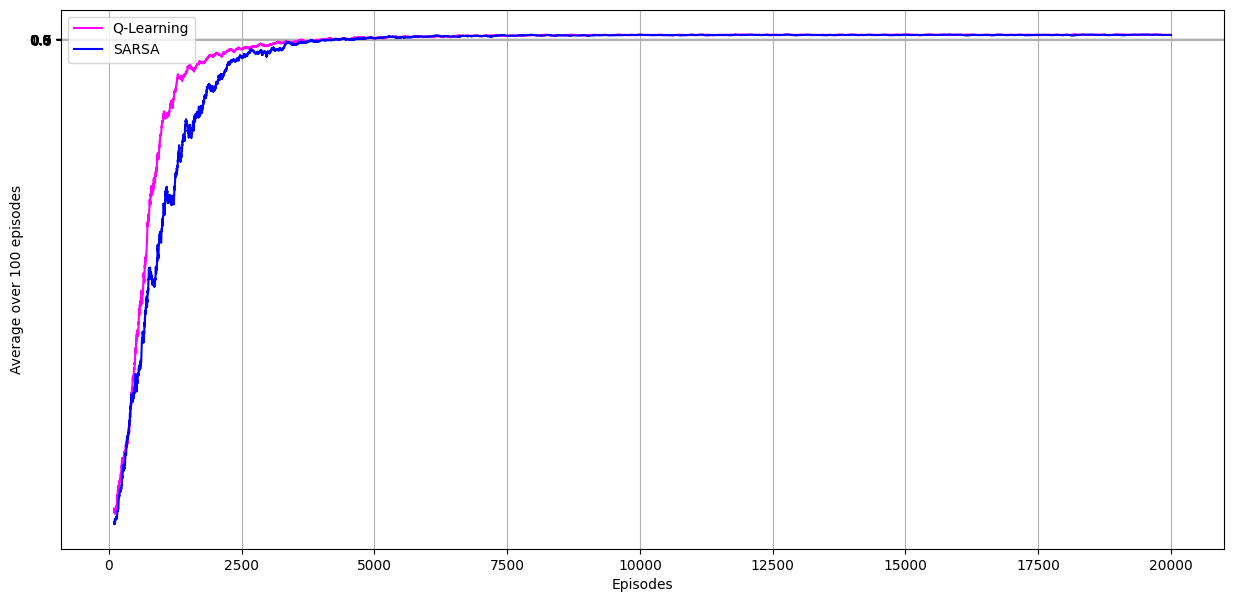

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(len(rewards_all_q_learning)), average_y_q_learning, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(rewards_all_sarsa)), average_y_sarsa, color='blue', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

- Taxi-v1 không có xác suất của từng bước đi nên số điểm thưởng nhận được trong từng episode không bị biến động nhiều như hai biểu đồ trên.
- Episode từ 0 đến 2500, số điểm thưởng của thuật toán SARSA tăng nhanh, 2500 episode tiếp theo số điểm thưởng tăng ít, và khi đặt tới đỉnh là khi 5000 episode. Lúc này số điểm thưởng ổn định.
- Q-learning tối ưu được điểm thưởng nhanh hơn SARSA trong trường hợp này. Khi chạy đến 2500 episode, số điểm thưởng đã tăng tới gần bằng số điểm thưởng.

#Kết luận:


*   Tối ưu toàn cục: Với đủ quá trình khám phá, Q-Learning sẽ đạt được chính sách tối ưu toàn cục. Mặt khác, SARSA sẽ yêu cầu quá trình khám phá phải giảm dần theo thời gian để đạt được chính sách tối ưu.
Ví dụ, giá trị epsilon trong SARSA sẽ phải giảm dần theo thời gian. Việc điều chỉnh siêu tham số này có thể gây khó khăn. Cụ thể trong Frozen Lake 4x4, khi tha
*   SARSA có xu hướng xác định đường dẫn an toàn hơn so với Q-learning. Bởi vì số điểm thưởng của SARSA ít bị biến động hơn Q-learning.

